In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
adata=sc.read_csv('pollen_imputed.csv',delimiter=',', first_column_names=None, dtype='float32')

In [3]:
adata.X.shape

(299, 9665)

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

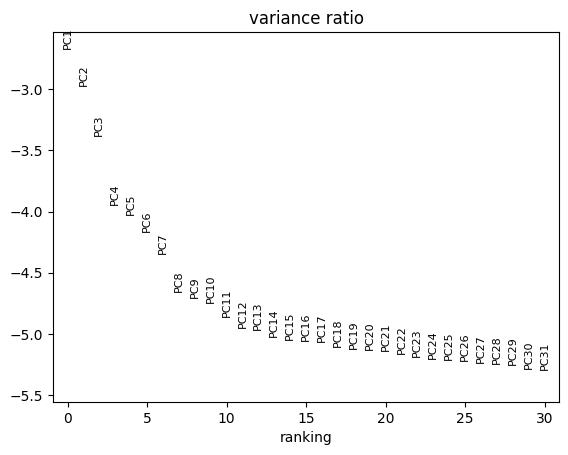

In [5]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [6]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata2)
##visualizing clusters
#sc.pl.umap(adata2, color=['leiden'])

/home/zaman/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


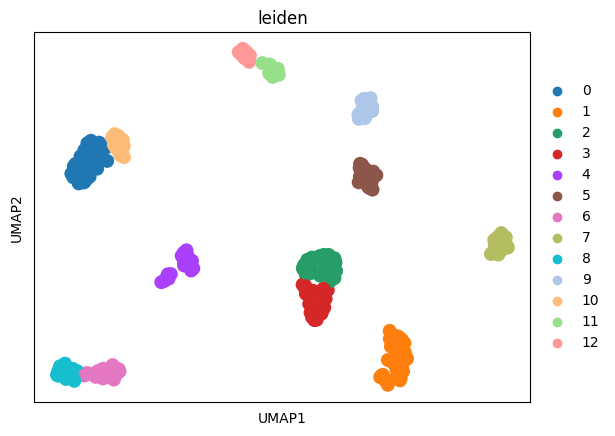

In [7]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
sil

-0.0015002238

In [9]:
adata.obs['leiden']

0      7
1      5
2      1
3      0
4      0
      ..
294    3
295    7
296    4
297    3
298    5
Name: leiden, Length: 299, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

In [10]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('pollenc.txt',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_18401/1706489607.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('pollenc.txt',dtype=None, delimiter=",")


In [11]:
l1

array([b'K562', b'K562', b'BJ', b'GW21+3', b'GW21+3', b'iPS', b'K562',
       b'iPS', b'HL60', b'GW21+3', b'K562', b'iPS', b'2339', b'BJ',
       b'GW21+3', b'BJ', b'GW21', b'K562', b'GW21+3', b'K562', b'HL60',
       b'BJ', b'BJ', b'iPS', b'iPS', b'HL60', b'BJ', b'2339', b'HL60',
       b'iPS', b'GW21+3', b'BJ', b'BJ', b'K562', b'GW21+3', b'BJ', b'BJ',
       b'iPS', b'BJ', b'iPS', b'Kera', b'GW16', b'BJ', b'BJ', b'HL60',
       b'iPS', b'BJ', b'BJ', b'HL60', b'iPS', b'HL60', b'2339', b'HL60',
       b'iPS', b'HL60', b'iPS', b'BJ', b'iPS', b'iPS', b'iPS', b'GW21+3',
       b'BJ', b'GW16', b'BJ', b'HL60', b'GW16', b'GW21+3', b'HL60',
       b'HL60', b'Kera', b'iPS', b'GW16', b'iPS', b'HL60', b'GW21+3',
       b'2339', b'HL60', b'K562', b'BJ', b'HL60', b'GW16', b'iPS',
       b'HL60', b'HL60', b'GW16', b'Kera', b'Kera', b'BJ', b'GW21+3',
       b'Kera', b'Kera', b'HL60', b'GW21+3', b'HL60', b'BJ', b'iPS',
       b'2339', b'iPS', b'K562', b'iPS', b'Kera', b'BJ', b'Kera', b'Kera',
       

In [11]:
l2

0      7
1      5
2      1
3      0
4      0
      ..
294    3
295    7
296    4
297    3
298    5
Name: leiden, Length: 299, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

In [12]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

0.698983895901718